In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/My Drive/BA820 Project/Dataset/review-Massachusetts.csv"
reviews = pd.read_csv(file_path)
file_path2 = "/content/drive/My Drive/BA820 Project/Dataset/meta-Massachusetts.csv"
meta = pd.read_csv(file_path2)

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447007 entries, 0 to 10447006
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  object 
 1   name     object 
 2   time     int64  
 3   rating   float64
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 637.6+ MB


In [ ]:
len(reviews)

10447007

In [ ]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92520 entries, 0 to 92519
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              92518 non-null  object 
 1   address           91491 non-null  object 
 2   gmap_id           92520 non-null  object 
 3   description       19425 non-null  object 
 4   latitude          92520 non-null  float64
 5   longitude         92520 non-null  float64
 6   category          92217 non-null  object 
 7   avg_rating        92520 non-null  float64
 8   num_of_reviews    92520 non-null  int64  
 9   price             19442 non-null  object 
 10  hours             71288 non-null  object 
 11  MISC              74990 non-null  object 
 12  state             64550 non-null  object 
 13  relative_results  86169 non-null  object 
 14  url               92520 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 10.6+ MB


In [ ]:
len(meta)

92520

###Data Cleaning

In [ ]:
reviews = reviews.drop(columns=['pics'])

In [ ]:
reviews.isnull().sum()

,0
user_id,74087
name,77
time,0
rating,74087
text,4650887
resp,9180111
gmap_id,0


Since many data points lack textual reviews and business responses, we have filled the blanks with “NA.”

In [ ]:
#fill all text and resp null values with 'N/A'
reviews['text'] = reviews['text'].fillna('N/A')
reviews['resp'] = reviews['resp'].fillna('N/A')
reviews.isnull().sum()

,0
user_id,74087
name,77
time,0
rating,74087
text,0
resp,0
gmap_id,0


In [ ]:
reviews1 = reviews.copy()

In [ ]:
#drop all null values in reviews
reviews1 = reviews1.dropna()

In [ ]:
reviews1.isnull().sum()

,0
user_id,0
name,0
time,0
rating,0
text,0
resp,0
gmap_id,0


In [ ]:
len(reviews1)

10372862

In [ ]:
import pandas as pd

sampled_df = reviews1.sample(n=1000000, random_state=42)
remaining_df = reviews1.drop(sampled_df.index)

print(len(sampled_df))
print(len(remaining_df))


1000000
9372862


In [ ]:
meta = meta.drop(columns=['state', 'price', 'description'])

In [ ]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92520 entries, 0 to 92519
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              92518 non-null  object 
 1   address           91491 non-null  object 
 2   gmap_id           92520 non-null  object 
 3   latitude          92520 non-null  float64
 4   longitude         92520 non-null  float64
 5   category          92217 non-null  object 
 6   avg_rating        92520 non-null  float64
 7   num_of_reviews    92520 non-null  int64  
 8   hours             71288 non-null  object 
 9   MISC              74990 non-null  object 
 10  relative_results  86169 non-null  object 
 11  url               92520 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 8.5+ MB


In [ ]:
meta.isnull().sum()

,0
name,2
address,1029
gmap_id,0
latitude,0
longitude,0
category,303
avg_rating,0
num_of_reviews,0
hours,21232
MISC,17530


In [ ]:
meta1 = meta.copy()
meta1 = meta1.dropna()
meta1.isnull().sum()

,0
name,0
address,0
gmap_id,0
latitude,0
longitude,0
category,0
avg_rating,0
num_of_reviews,0
hours,0
MISC,0


In [ ]:
len(meta1)

59178

The box plot shows that it has a few skewed data but not the outlier, we do not need to delete them here.

###Merge

In [ ]:
merged_data = sampled_df.merge(meta1, on="gmap_id", how="left")
merged_data.head()

,user_id,name_x,time,rating,text,resp,gmap_id,name_y,address,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,relative_results,url
0,116404531305033742641,Zygintas Krasodomskis,1568240961087,5.0,"Honestly, best burgers in town",N/A,0x89e37a19e56a4565:0xbb2aefc495e8c505,Five Guys,"Five Guys, 263 Huntington Ave, Boston, MA 02115",42.342201,-71.086128,"['Hamburger restaurant', 'American restaurant'...",4.3,842.0,"[['Saturday', '11AM–10PM'], ['Sunday', '11AM–9...","{'Service options': ['No-contact delivery', 'D...","['0x89e37a0ef037cc93:0xdb4e885f04209890', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,101806853201406057266,Olga Harbar,1590701094969,3.0,N/A,N/A,0x89e45acc1861f709:0x9ccc502a907ff195,Price Rite of Seekonk,"Price Rite of Seekonk, 140 Taunton Ave, Seekon...",41.826199,-71.341056,"['Grocery store', 'Bakery', 'Grocery delivery ...",4.3,895.0,"[['Tuesday', '8AM–9PM'], ['Wednesday', '8AM–9P...","{'Service options': ['In-store shopping', 'Del...","['0x89e45ae7e141c4b5:0xe96d1f60cac5ecc', '0x89...",https://www.google.com/maps/place//data=!4m2!3...
2,110623621391484838669,Amit Patel,1558575636156,4.0,N/A,N/A,0x89e379cf7e6b504d:0xe1c48bca99fcba2b,Coreanos Allston,"Coreanos Allston, 172 Brighton Ave, Boston, MA...",42.352960,-71.133063,['Korean restaurant'],4.6,446.0,"[['Sunday', '11:30AM–10PM'], ['Monday', '11:30...","{'Service options': ['Delivery', 'Dine-in', 'T...","['0x89e379702a98de8b:0x2fce7ce86a38c6cc', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
3,116809509309515294254,Mario Delgado,1547662617512,5.0,N/A,N/A,0x89e316a2dfcdfe35:0x7870a5700e9faf69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,114893265310260912873,Jerry Cardillo,1535435901765,4.0,N/A,N/A,0x89fca77e3b810389:0x6a6bdb1acb82a3cf,Pied Bar,"Pied Bar, 193A Commercial St, Provincetown, MA...",42.048708,-70.188871,"['Bar & grill', 'Night club', 'Restaurant']",3.9,38.0,"[['Friday', '12PM–1AM'], ['Saturday', '12PM–1A...","{'Service options': ['Delivery'], 'Offerings':...","['0x89fca77e2f735d79:0x8bfdd6c19fe7d5fc', '0x8...",https://www.google.com/maps/place//data=!4m2!3...


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001342 entries, 0 to 1001341
Data columns (total 18 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   user_id           1001342 non-null  object 
 1   name_x            1001342 non-null  object 
 2   time              1001342 non-null  int64  
 3   rating            1001342 non-null  float64
 4   text              1001342 non-null  object 
 5   resp              1001342 non-null  object 
 6   gmap_id           1001342 non-null  object 
 7   name_y            861492 non-null   object 
 8   address           861492 non-null   object 
 9   latitude          861492 non-null   float64
 10  longitude         861492 non-null   float64
 11  category          861492 non-null   object 
 12  avg_rating        861492 non-null   float64
 13  num_of_reviews    861492 non-null   float64
 14  hours             861492 non-null   object 
 15  MISC              861492 non-null   object 
 16  

In [ ]:
missing_gmap_ids = merged_data[merged_data['name_y'].isnull()]['gmap_id'].unique()
print(len(missing_gmap_ids))
print(missing_gmap_ids[:10])


20358
['0x89e316a2dfcdfe35:0x7870a5700e9faf69'
 '0x89e379d651739917:0x2cb8d55efc19ce99'
 '0x89e377427d7f0199:0x5937c65cee2427f0'
 '0x89e6a40fb12bc597:0xef37aeaccebe4b91'
 '0x89e3bd33721b731b:0x8e10b5ee75dfb2cc'
 '0x89e3e60bee7cc07b:0x1a0930f266eaa1d6'
 '0x89e37087db28e9bf:0x3083246f220cabf1'
 '0x89e3a46a96e2d591:0x1a25f66c452a9ba8'
 '0x89e4e5b578122ce9:0x55027c91857460ff'
 '0x89e37a0b5a813773:0xdfec29f0c76c88e6']


In [ ]:
merged_data.describe()

,time,rating,latitude,longitude,avg_rating,num_of_reviews
count,1.001342e+06,1.001342e+06,861492.000000,861492.000000,861492.000000,861492.000000
mean,1.547517e+12,4.308223e+00,42.261637,-71.302446,4.310520,870.891293
std,4.502468e+10,1.144373e+00,0.297217,2.432304,0.388509,1427.750215
min,1.032826e+12,1.000000e+00,28.647890,-78.673003,1.000000,1.000000
25%,1.520430e+12,4.000000e+00,42.133053,-71.453241,4.100000,173.000000
50%,1.551806e+12,5.000000e+00,42.326856,-71.122051,4.400000,425.000000
75%,1.577997e+12,5.000000e+00,42.406902,-71.040769,4.600000,931.000000
max,1.631063e+12,5.000000e+00,42.879624,180.000000,5.000000,9998.000000


In [ ]:
merged_data1 = merged_data.copy()
merged_data1 = merged_data1.dropna()

In [ ]:
merged_data1.isnull().sum()

,0
user_id,0
name_x,0
time,0
rating,0
text,0
resp,0
gmap_id,0
name_y,0
address,0
latitude,0


In [ ]:
len(merged_data1)

861492

In [ ]:
merged_data1.to_csv("merged_data1.csv", index=False)

In [ ]:
from google.colab import files
files.download("merged_data1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###EDA

In [ ]:
merged_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 861492 entries, 0 to 1001341
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           861492 non-null  object 
 1   name_x            861492 non-null  object 
 2   time              861492 non-null  int64  
 3   rating            861492 non-null  float64
 4   text              861492 non-null  object 
 5   resp              861492 non-null  object 
 6   gmap_id           861492 non-null  object 
 7   name_y            861492 non-null  object 
 8   address           861492 non-null  object 
 9   latitude          861492 non-null  float64
 10  longitude         861492 non-null  float64
 11  category          861492 non-null  object 
 12  avg_rating        861492 non-null  float64
 13  num_of_reviews    861492 non-null  float64
 14  hours             861492 non-null  object 
 15  MISC              861492 non-null  object 
 16  relative_results  861492

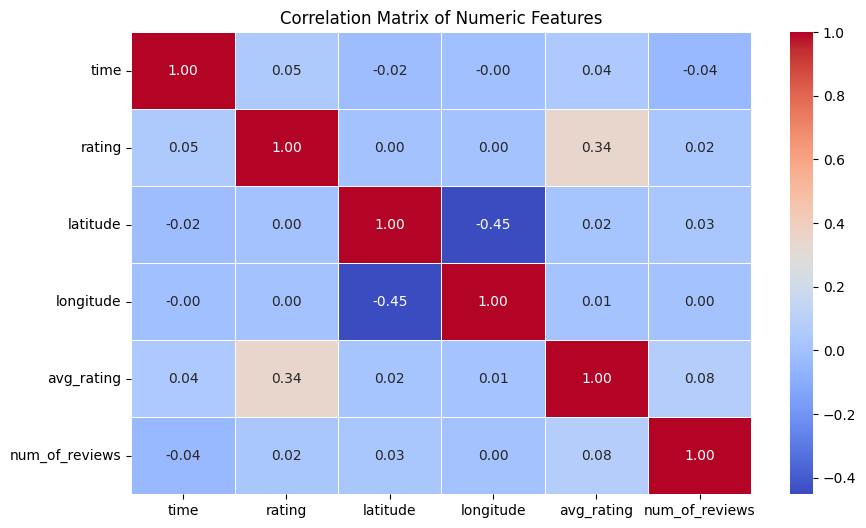

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = merged_data1.select_dtypes(include=['number'])

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


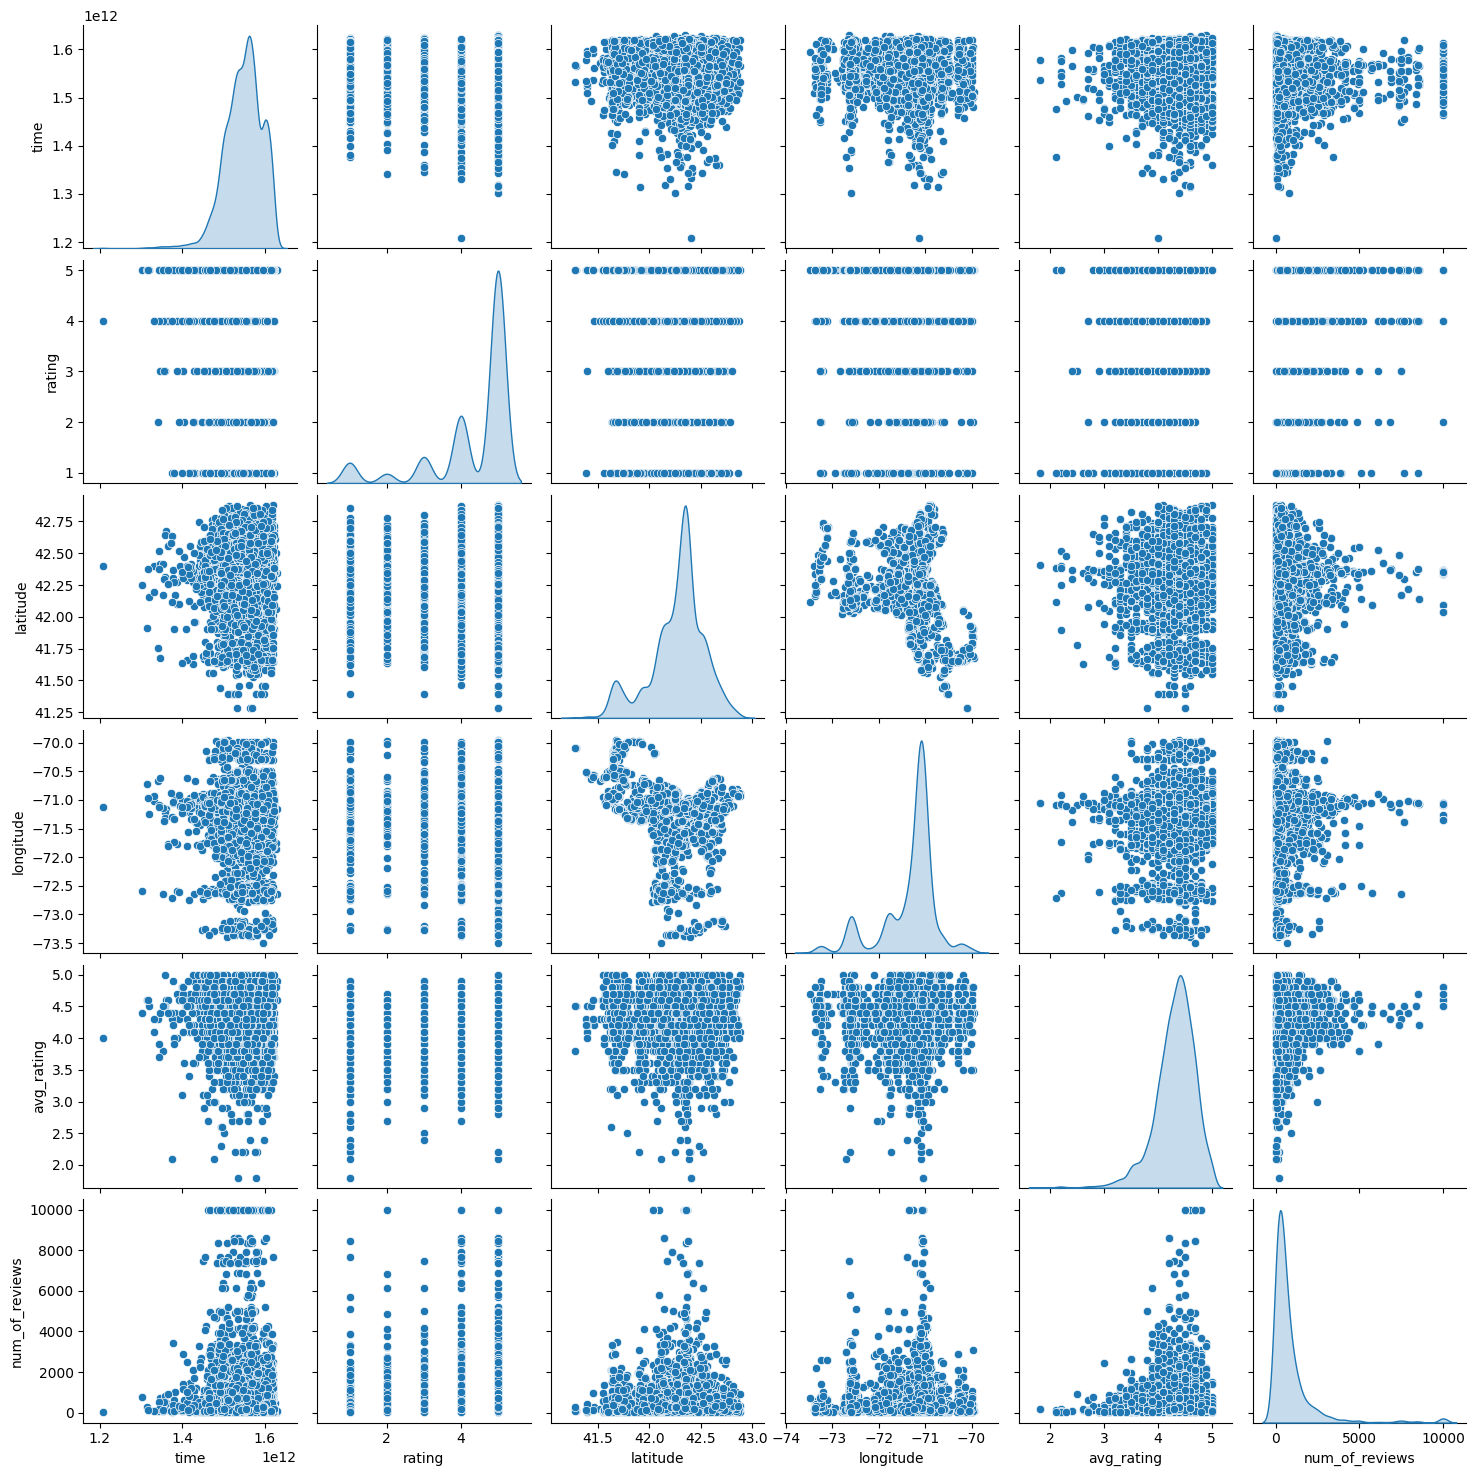

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = merged_data1.select_dtypes(include=['number'])

sample_size = 5000
if len(numeric_cols) > sample_size:
    numeric_cols = numeric_cols.sample(sample_size, random_state=42)

sns.pairplot(numeric_cols, diag_kind="kde")
plt.show()
